# Exercise 3.1



## Assignment

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:
1. By sampling **directly** the final asset price $S(T)$for a $GBM(r,\sigma^2)$
2. By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$
make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$.  As usual, in computing statistical uncertainties, use data blocking.

**Market options**

Call and Put options are some of the simplest options in the Market. In practice, they are contracts over which the buyer gains the right of performing a certain operation (sell or buy at an established price) while the seller accepts in turn the decision of the buyer.European options have a maturity: the buyer can exercise his right only after a certain period of time, while other types of options, such as American and Asian options are defined differently. 
Historically options were introduced as an insurance product: for example a bread manifacturer would purchase an option for the flour price in order to protect himself in case of drought.

- More specifically, in a european **call** option the buyer purchases the right of buying a certain asset $S$ for a fixed price $K$ (called strike) after a time period $T$: the underlying idea that drives this kind of transaction is betting that after this time period the price of $S$ will be grater than $K$, allowing the buyer to purchase it for a lower price. Since this is a right and not a duty, if after this time period the price of $S$, namingly $S_{T}$, is lower than $K$, it is convenient for the agent to buy at the market price instead of the strike and the right will not likely be exercised. Therefore, the profit of this kind of contingent claim is:

$$C=(S_{T}-K)^{+}=max(S_{T}-K,0)$$

- Conversely, in a **Put** european option, the buyer has the right of selling the asset $S$ after a time period $T$ for a price $K$, with the aim of insuring himself against the default of the asset. Hence, the profit will be described by:

$$P=(K-S_{T})^{+}=max(K-S_{T},0)$$

An important remark is that, differently from a call, a put option is **bounded**.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

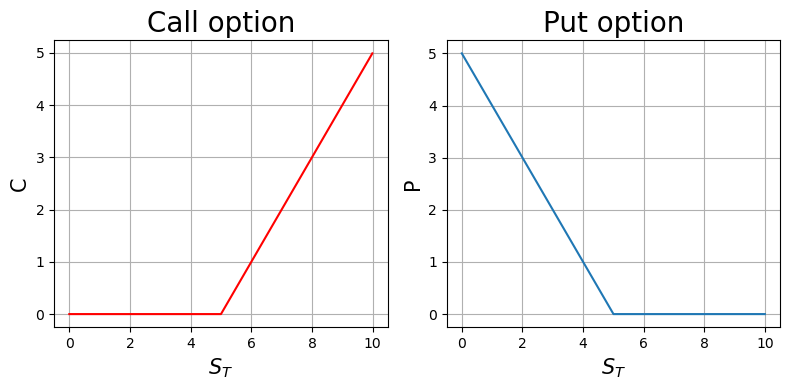

In [29]:
plt.figure(figsize=(8,4))
x=np.arange(0,10,0.01)

K=5  #Strike price
zero = np.zeros((len(x)))

plt.subplot(1,2,1)

plt.plot(x, np.maximum(x-K, zero), c='red')
plt.xlabel('$S_{T}$', fontsize=15)
plt.ylabel('C',fontsize=15)
plt.grid()
plt.title('Call option', fontsize=20)

plt.subplot(1,2,2)

plt.plot(x, np.maximum(K-x, zero), c='tab:blue')
plt.xlabel('$S_{T}$', fontsize=15)
plt.ylabel('P',fontsize=15)
plt.grid()
plt.title('Put option', fontsize=20)

plt.tight_layout()
plt.show()

**Black-Scholes-Merton model**

In the context of No-Arbitrage pricing the Black-Scholes model gained popularity since the 70's. The main assumptions of the model is that the Market cannot suffer from liquidity crisis, all transactions are performed in continuous time, NoA holds and the market prices follow a **geometric brownian motion**.

The geometric brownian motion is a continuos-time stochastic process in which the logarithm of a randomly varying  quantity, i.e. the price in our example, follows a Wiener process with drift. Likewise, the Wiener process is a stochastic process with independent increments that are normally distributed with constant mean. This is described by:

$$W_{t+u}-W_{t}\sim\mathcal{N}(0,u)$$

All together, the stochastic differential equation describing the geometric brownian motion is given by:

$$dS_{t}=\mu S_{t}dt+\sigma S_{t}dW_{t}$$

with $dW_{t}$ being a Wiener process and constant volatility $\sigma$ and drift $\mu$. We will assume a model with constant coefficients and use $\mu=r$, our risk-free asset.
Under Itô's interpretation, the previous equation has an analytical solution given by:

$$S(t)=S_{0}\exp{((\mu-\frac{\sigma^{2}}{2})+\sigma(W_t-W_0))}$$

This means that the term $W_t-W_0 \sim\mathcal{N}(0,t)$.


The following is a simple example of how a geometric brownian motion should look:

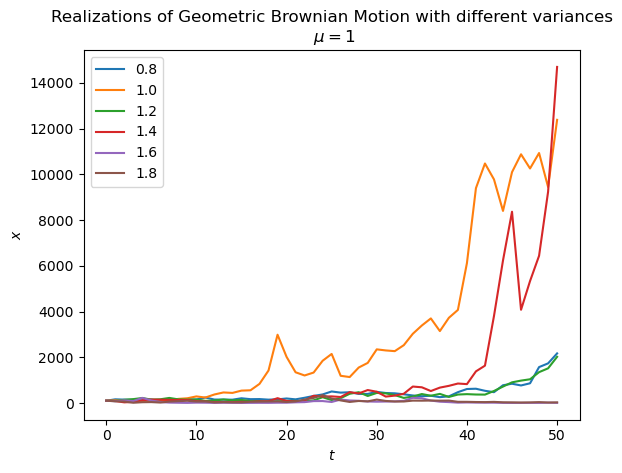

In [30]:
# Python code for the plot

mu = 1
n = 50
dt = 0.1
x0 = 100
np.random.seed(1)

sigma = np.arange(0.8, 2, 0.2)

x = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(len(sigma), n)).T
)
x = np.vstack([np.ones(len(sigma)), x])
x = x0 * x.cumprod(axis=0)

plt.plot(x)
plt.legend(np.round(sigma, 2))
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of Geometric Brownian Motion with different variances\n $\mu=1$"
)
plt.show()

In practice, in my code I sample $X \sim \mathcal{N}(0,T)$. Therefore I compute $S(T)=S_{0}\exp{((\mu-\frac{\sigma^{2}}{2})+\sigma(X))}$ so that I can evaluate $C=(S_{T}-K)^{+}=max(S_{T}-K,0)$ and $P=(K-S_{T})^{+}=max(K-S_{T},0)$ and divide them for $e^{rT}$, the profit I would have made by investing in the risk-free asset from time 0 to time T. This is then the price for $C[S(0),0]$ and $P[S(0),0]$. 

I should then compare it with the analytical solution of the B&S model for the european call and put options with the assumptions explained before, i.e.:

$$C(S_{t},t)=N(d_1)S_t-N(d_2)Ke^{-r(T-t)}$$

With: $$N(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}e^{-\frac{z^2}{2}}dz$$
$$d_1=\frac{1}{\sigma\sqrt{T-t}}\left[ln(\frac{S_t}{K})+(r+\frac{\sigma^2}{2})(T-t)\right]$$
$$d_2=d_1-\sigma\sqrt{T-t}$$

While for the put option:

$$P(S_t,t)=Ke^{-r(T-t)}-S_t+C(S_t,t)$$

In [55]:
from scipy.special import erf

def N(x):
    return 0.5 * (1 + erf(x / (2**0.5)))

S_0 = 100
sigma = 0.25
K = 100.
T = 1.
r = 0.1

d_1 = 1 / ( sigma * np.sqrt(T) ) * ( np.log( S_0 / K ) + ( ( sigma ** 2 ) / 2 + r ) * ( T ))
d_2 = d_1 - sigma * np.sqrt(T)

C_expected = N(d_1) * S_0 - N(d_2) * K * np.exp(- r * T)
P_expected = K * np.exp(- r * T) - S_0 + C_expected

print('CALL OPTION PRICE: ', C_expected)
print('PUT OPTION PRICE: ', P_expected)



CALL OPTION PRICE:  14.975790778311278
PUT OPTION PRICE:  5.459532581907226


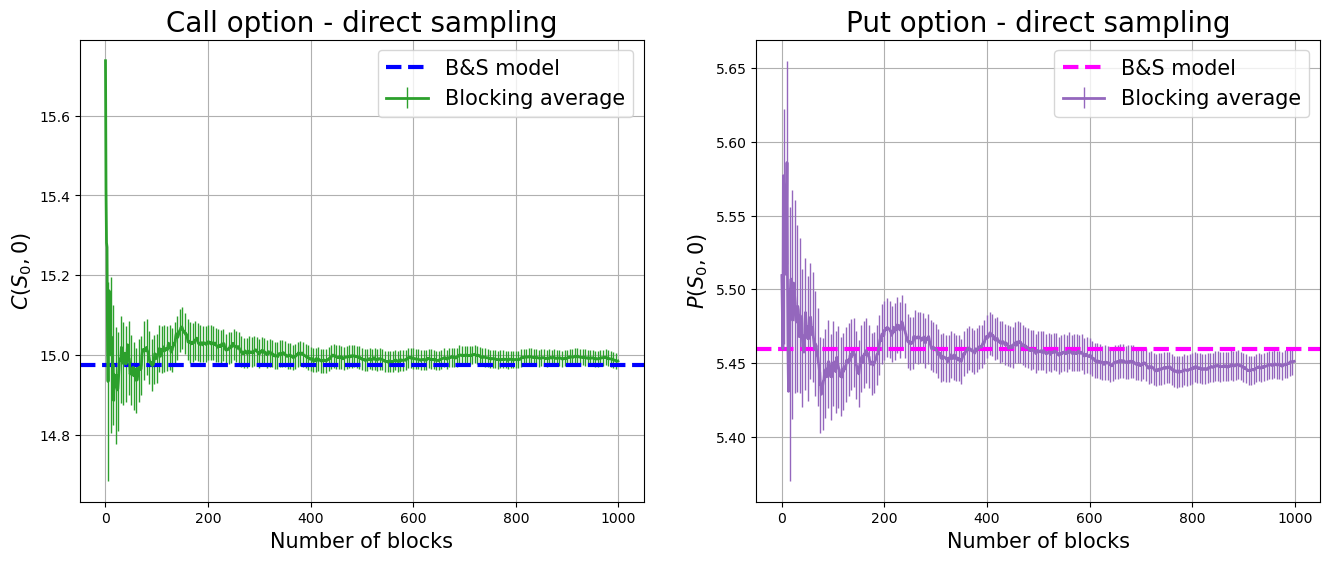

In [96]:
# Load data from file '3.1/3.1.call.txt', using columns 0 and 1
data = np.loadtxt('3.1/3.1.call.txt', usecols=(0, 1))

# Extract the first column of data as 'progressive_average'
progressive_average = data[:, 0]

# Extract the second column of data as 'progressive_error'
progressive_error = data[:, 1]

# Generate an array 'x' with values ranging from 1000 to 1000000 in steps of 10000
x = np.arange(1000)

# Create a figure with 2 subplots, using width ratios of [2, 1.3] for the subplots
fig = plt.figure(figsize=(16,6))

# Plot data in the first subplot
plt.subplot(1,2,1)
plt.errorbar(x, progressive_average, yerr=progressive_error,lw=2, elinewidth=1, errorevery=5, label='Blocking average', c='tab:green')
plt.grid(True)  # Add grid lines to the plot
plt.axhline(C_expected, ls='--', lw=3, c='blue', label='B&S model')  # Add a horizontal line at y=0 in red
plt.xlabel('Number of blocks', fontsize=15)
plt.ylabel('$C(S_{0},0)$', fontsize=15)
plt.legend(fontsize=15)  # Add a legend to the plot
plt.title('Call option - direct sampling', fontsize=20)

#data for the put option
data = np.loadtxt('3.1/3.1.put.txt', usecols=(0, 1))

# Extract the first column of data as 'progressive_average'
progressive_average = data[:, 0]

# Extract the second column of data as 'progressive_error'
progressive_error = data[:, 1]

# Plot data in the second subplot
plt.subplot(1,2,2)
plt.errorbar(x, progressive_average, yerr=progressive_error,lw=2, elinewidth=1, errorevery=5, label='Blocking average', c='tab:purple')
plt.grid(True)  # Add grid lines to the plot
plt.axhline(P_expected, ls='--', lw=3, c='fuchsia', label='B&S model')  # Add a horizontal line at y=0 in red
plt.xlabel('Number of blocks', fontsize=15)
plt.ylabel('$P(S_{0},0)$', fontsize=15)
plt.legend(fontsize=15)  # Add a legend to the plot
plt.title('Put option - direct sampling', fontsize=20)

#Show the plot
plt.show()


I am currently working with $M=10^6$ throws and $N=10^3$ blocks. As clear from the previous picture, discrete sampling Montecarlo works just fine. 

However, it is possible to discretize the process: instead of sampling only the last time step $T$ I can sample a number of $step=100$ of time steps in the same way and each time, using a GMB with a Wiener process $W_T-W_0$ I consider a number $step$ of points of the process. Therefore, at each time step I only need to sample $X\sim\mathcal{N}(0, t_{i+1}-t_{i})$ and modify the previous code using: 

$$S_{t_{i+1}} = S_t \cdot exp((r - \sigma^2\cdot 0.5) (t_{i+1}-t_{i}) + (\sigma x \sqrt{(t_{i+1}-t_{i})}))$$

Where the $\sqrt{(t_{i+1}-t_{i})}$ is needed to adjust for the correct variance given the considered timestep of the Wiener process.
            

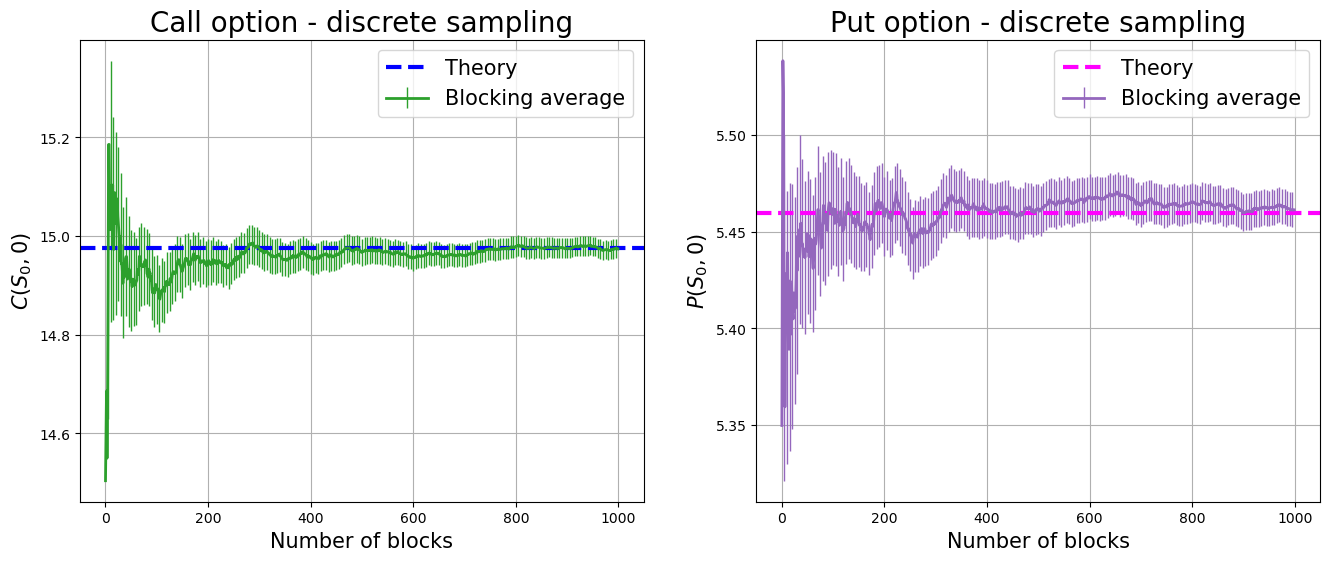

In [97]:
# Load data from file '3.1/3.1.call.txt', using columns 0 and 1
data = np.loadtxt('3.1/3.1.call_discrete.txt', usecols=(0, 1))

# Extract the first column of data as 'progressive_average'
progressive_average = data[:, 0]

# Extract the second column of data as 'progressive_error'
progressive_error = data[:, 1]

# Generate an array 'x' with values ranging from 1000 to 1000000 in steps of 10000
x = np.arange(1000)

# Create a figure with 2 subplots, using width ratios of [2, 1.3] for the subplots
fig = plt.figure(figsize=(16,6))

# Plot data in the first subplot
plt.subplot(1,2,1)
plt.errorbar(x, progressive_average, yerr=progressive_error,lw=2, elinewidth=1, errorevery=5, label='Blocking average', c='tab:green')
plt.grid(True)  # Add grid lines to the plot
plt.axhline(C_expected, ls='--', lw=3, c='blue', label='Theory')  # Add a horizontal line at y=0 in red
plt.xlabel('Number of blocks', fontsize=15)
plt.ylabel('$C(S_{0},0)$', fontsize=15)
plt.legend(fontsize=15)  # Add a legend to the plot
plt.title('Call option - discrete sampling', fontsize=20)

#data for the put option
data = np.loadtxt('3.1/3.1.put_discrete.txt', usecols=(0, 1))

# Extract the first column of data as 'progressive_average'
progressive_average = data[:, 0]

# Extract the second column of data as 'progressive_error'
progressive_error = data[:, 1]

# Plot data in the second subplot
plt.subplot(1,2,2)
plt.errorbar(x, progressive_average, yerr=progressive_error,lw=2, elinewidth=1, errorevery=5, label='Blocking average', c='tab:purple')
plt.grid(True)  # Add grid lines to the plot
plt.axhline(P_expected, ls='--', lw=3, c='fuchsia', label='Theory')  # Add a horizontal line at y=0 in red
plt.xlabel('Number of blocks', fontsize=15)
plt.ylabel('$P(S_{0},0)$', fontsize=15)
plt.legend(fontsize=15)  # Add a legend to the plot
plt.title('Put option - discrete sampling', fontsize=20)

#Show the plot
plt.show()


Even without a quantitative analysis, it becomes clear that the discretization led to a result closer to the expected value given by the Black and Scholes model.